# Project to predict whether the mushroom is poisonous or edible


# DATASET INFORMATION

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.



In [128]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
#Loading dataset
df=pd.read_csv("agaricus_lepiota _data.csv",sep=",",na_values="?")
df

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap shape                 8124 non-null   object
 2   cap surface               8124 non-null   object
 3   cap color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill attachment           8124 non-null   object
 7   gill spacing              8124 non-null   object
 8   gill size                 8124 non-null   object
 9   gill color                8124 non-null   object
 10  stalk shape               8124 non-null   object
 11  stalk root                5644 non-null   object
 12  stalk surface above ring  8124 non-null   object
 13  stalk surface below ring  8124 non-null   object
 14  stalk color above ring  

UNDERSTANDING THE DATASET

Total 23 columns in dataset

LIST OF ATTRIBUTES AND ITS INFORMATION


1.classes:edible=e, poisonous=p
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
5. bruises?: bruises=t,no=f
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: attached=a,descending=d,free=f,notched=n
8. gill-spacing: close=c,crowded=w,distant=d
9. gill-size: broad=b,narrow=n
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
11. stalk-shape: enlarging=e,tapering=t
12. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
17. veil-type: partial=p,universal=u
18. veil-color: brown=n,orange=o,white=w,yellow=y
19. ring-number: none=n,one=o,two=t
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
23. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d





In [131]:
#column names
df.columns

Index(['classes', 'cap shape', 'cap surface', 'cap color', 'bruises', 'odor',
       'gill attachment', 'gill spacing', 'gill size', 'gill color',
       'stalk shape', 'stalk root', 'stalk surface above ring',
       'stalk surface below ring', 'stalk color above ring',
       'stalk color below ring', 'veil type', 'veil color', 'ring number',
       'ring type', 'spore print color', 'population', 'habitat'],
      dtype='object')

In [132]:
#data types
df.dtypes

classes                     object
cap shape                   object
cap surface                 object
cap color                   object
bruises                     object
odor                        object
gill attachment             object
gill spacing                object
gill size                   object
gill color                  object
stalk shape                 object
stalk root                  object
stalk surface above ring    object
stalk surface below ring    object
stalk color above ring      object
stalk color below ring      object
veil type                   object
veil color                  object
ring number                 object
ring type                   object
spore print color           object
population                  object
habitat                     object
dtype: object

we observe that all the attributes is of type=object. so we change the dtype=object to dtype=int 

In [133]:
df.columns

Index(['classes', 'cap shape', 'cap surface', 'cap color', 'bruises', 'odor',
       'gill attachment', 'gill spacing', 'gill size', 'gill color',
       'stalk shape', 'stalk root', 'stalk surface above ring',
       'stalk surface below ring', 'stalk color above ring',
       'stalk color below ring', 'veil type', 'veil color', 'ring number',
       'ring type', 'spore print color', 'population', 'habitat'],
      dtype='object')

In [134]:
df["veil type"].value_counts().sum()

8124

# convert attribute of dtype object to integer

In [135]:
df["classes"].unique()

array(['p', 'e'], dtype=object)

In [136]:

df["classes"]=df["classes"].map({'p': 0, 'e': 1}).astype(int)


In [137]:
df["cap shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [138]:
df["cap shape"]=df["cap shape"].map({"x":0,"b":1,"s":2,"f":3,"k":4,"c":5})


In [139]:
df["cap surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [140]:
df["cap surface"]=df["cap surface"].map({"s":1,"f":2,"y":3,"g":0})


In [141]:
df["cap color"].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [142]:
df["cap color"]=df["cap color"].map({"n":1,"y":2,"w":3,"g":4,"e":5,"p":6,"b":7,"u":8,"c":9,"r":0})


In [143]:
df["bruises"].unique()

array(['t', 'f'], dtype=object)

In [144]:
df["bruises"]=df["bruises"].map({"t":1,"f":0})


In [145]:
df["odor"].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [146]:
df["odor"]=df["odor"].map({"p":1,"a":2,"l":3,"n":4,"f":5,"c":6,"y":7,"s":8,"m":0})


In [147]:
df["gill attachment"].unique()

array(['f', 'a'], dtype=object)

In [148]:
df["gill attachment"]=df["gill attachment"].map({"f":1,"a":0})


In [149]:
df["gill spacing"].unique()

array(['c', 'w'], dtype=object)

In [150]:
df["gill spacing"]=df["gill spacing"].map({"c":1,"w":0})

In [151]:
df["gill size"].unique()

array(['n', 'b'], dtype=object)

In [152]:
df["gill size"]=df["gill size"].map({"n":1,"b":0})


In [153]:
df["gill color"].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

In [154]:
df["gill color"]=df["gill color"].map({"k":1,"n":2,"g":3,"p":4,"w":5,"h":6,"u":7,"e":8,"b":9,"r":10,"y":11,"o":0})

In [155]:
df["stalk shape"].unique()

array(['e', 't'], dtype=object)

In [156]:
df["stalk shape"]=df["stalk shape"].map({"e":1,"t":0})

In [157]:
df["stalk root"].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [158]:
df["stalk root"]=df["stalk root"].map({"e":1,"c":2,"b":3,"r":0})

In [159]:
df["stalk surface above ring"].unique()

array(['s', 'f', 'k', 'y'], dtype=object)

In [160]:
df["stalk surface above ring"]=df["stalk surface above ring"].map({"s":1,"f":2,"k":3,"y":0})

In [161]:
df["stalk surface below ring"].unique()

array(['s', 'f', 'y', 'k'], dtype=object)

In [162]:
df["stalk surface below ring"]=df["stalk surface below ring"].map({"s":1,"f":2,"y":3,"k":0})


In [163]:
df["stalk color above ring"].unique()

array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object)

In [164]:
df["stalk color above ring"]=df["stalk color above ring"].map({"w":1,"g":2,"p":3,"n":4,"b":5,"e":6,"o":7,"c":8,"y":0})

In [165]:
df["stalk color below ring"].unique()

array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object)

In [166]:
df["stalk color below ring"]=df["stalk color below ring"].map({"w":1,"g":2,"p":3,"n":4,"b":5,"e":6,"o":7,"c":8,"y":0})

In [167]:
df["veil type"].unique()

array(['p'], dtype=object)

In [168]:
df["veil type"]=df["veil type"].map({"p":0})

In [169]:
df["veil color"].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

In [170]:
df["veil color"]=df["veil color"].map({"w":1,"n":2,"o":3,"y":0})

In [171]:
df["ring number"].unique()

array(['o', 't', 'n'], dtype=object)

In [172]:
df["ring number"]=df["ring number"].map({"o":1,"t":2,"n":0})

In [173]:
df["ring type"].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)

In [174]:
df["ring type"]=df["ring type"].map({"p":1,"e":2,"l":3,"f":4,"n":0})

In [175]:
df["population"].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

In [176]:
df["population"]=df["population"].map({"s":1,"n":2,"a":3,"v":4,"y":5,"c":0})

In [177]:
df["spore print color"].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

In [178]:
df["spore print color"]=df["spore print color"].map({"k":1,"n":2,"u":3,"h":4,"w":5,"r":6,"o":7,"y":8,"b":0})

In [179]:
df["habitat"].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [180]:
df["habitat"]=df["habitat"].map({"u":1,"g":2,"m":3,"d":4,"p":5,"w":6,"l":0})

In [181]:
df

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,0,0,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,1,0,1,2,1,2,1,1,0,1,...,1,1,1,0,1,1,1,2,2,2
2,1,1,1,3,1,3,1,1,0,2,...,1,1,1,0,1,1,1,2,2,3
3,0,0,3,3,1,1,1,1,1,2,...,1,1,1,0,1,1,1,1,1,1
4,1,0,1,4,0,4,1,0,0,1,...,1,1,1,0,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,1,1,0,4,0,1,0,11,...,1,7,7,0,3,1,1,0,0,0
8120,1,0,1,1,0,4,0,1,0,11,...,1,7,7,0,2,1,1,0,4,0
8121,1,3,1,1,0,4,0,1,0,2,...,1,7,7,0,3,1,1,0,0,0
8122,0,4,3,1,0,7,1,1,1,9,...,0,1,1,0,1,1,2,5,4,0


In [182]:
df.describe()

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,2.083703,3.073855,0.415559,4.549483,0.974151,0.838503,0.309207,5.179714,...,0.860167,2.140817,2.162482,0.0,1.034466,1.069424,1.674052,3.147710,3.436731,3.077794
std,0.499708,1.588969,0.842012,1.723025,0.492848,1.559486,0.158695,0.368011,0.462195,2.642134,...,0.691229,1.550135,1.557528,0.0,0.242669,0.271064,0.763640,1.701277,1.479911,1.589035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,3.000000,...,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000
50%,1.000000,1.000000,2.000000,3.000000,0.000000,4.000000,1.000000,1.000000,0.000000,5.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000
75%,1.000000,3.000000,3.000000,4.000000,1.000000,5.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,3.000000,3.000000,0.0,1.000000,1.000000,2.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Finding and Removing NaN values

In [183]:
#finding nan values
df.isnull()

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [184]:
df.isnull().sum()

classes                        0
cap shape                      0
cap surface                    0
cap color                      0
bruises                        0
odor                           0
gill attachment                0
gill spacing                   0
gill size                      0
gill color                     0
stalk shape                    0
stalk root                  2480
stalk surface above ring       0
stalk surface below ring       0
stalk color above ring         0
stalk color below ring         0
veil type                      0
veil color                     0
ring number                    0
ring type                      0
spore print color              0
population                     0
habitat                        0
dtype: int64

we found that there are very high missing datas in "stalk root "

In [185]:
#Reassigning NaN values with mean of it
df['stalk root'].mean()


2.4025513819985824

In [186]:
df["stalk root"].fillna(df['stalk root'].mean(),inplace=True)

In [187]:
df.isnull().sum()

classes                     0
cap shape                   0
cap surface                 0
cap color                   0
bruises                     0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk surface above ring    0
stalk surface below ring    0
stalk color above ring      0
stalk color below ring      0
veil type                   0
veil color                  0
ring number                 0
ring type                   0
spore print color           0
population                  0
habitat                     0
dtype: int64

# EDA

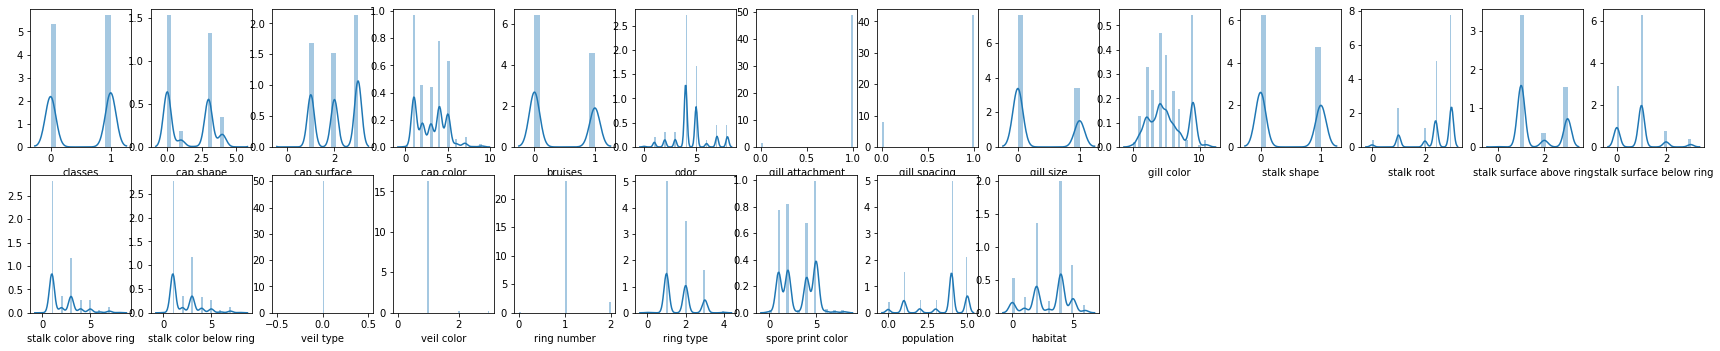

In [188]:
#univariate analysis
collist=df.columns.values
ncol=14
nrow=10
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [189]:
#Multivariate analysis
corr=df.corr()
corr

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
classes,1.000000,-0.112110,0.002276,-0.053587,0.501530,-0.554841,-0.129200,-0.348387,-0.540024,-0.451688,...,0.469179,-0.221315,-0.211908,NaN,0.145142,0.214366,-0.543410,-0.604366,-0.256655,0.012502
cap shape,-0.112110,1.000000,-0.000421,0.002852,-0.120509,0.163831,-0.040082,0.043906,0.151921,0.212743,...,-0.048383,0.068001,0.073239,NaN,0.029202,0.041268,0.089932,0.217629,0.061447,-0.008336
cap surface,0.002276,-0.000421,1.000000,-0.006298,0.128576,-0.053031,0.176500,0.280412,-0.082961,0.000985,...,-0.053495,0.106037,0.112411,NaN,-0.192458,-0.122551,0.116722,-0.077383,0.286405,0.252759
cap color,-0.053587,0.002852,-0.006298,1.000000,0.076351,0.093019,0.163660,0.007940,-0.032389,0.066095,...,-0.041770,-0.053305,-0.042638,NaN,-0.173323,0.149280,-0.024367,0.089343,0.007047,0.114266
bruises,0.501530,-0.120509,0.128576,0.076351,1.000000,-0.566219,0.137359,0.299473,-0.369596,-0.298625,...,0.361394,-0.264816,-0.275288,NaN,-0.119770,0.056788,-0.681547,-0.530131,-0.051716,0.183189
odor,-0.554841,0.163831,-0.053031,0.093019,-0.566219,1.000000,0.093215,0.144346,0.461097,0.591272,...,-0.422072,0.121986,0.116505,NaN,-0.050050,-0.048317,0.448132,0.560738,0.324874,0.078131
gill attachment,-0.129200,-0.040082,0.176500,0.163660,0.137359,0.093215,1.000000,-0.071489,0.108984,0.032807,...,-0.073357,-0.519668,-0.514936,NaN,-0.897518,0.093236,0.162080,-0.111706,0.177024,0.280383
gill spacing,-0.348387,0.043906,0.280412,0.007940,0.299473,0.144346,-0.071489,1.000000,0.108333,0.261802,...,-0.224292,0.324727,0.298362,NaN,0.073363,-0.243014,0.026440,0.163948,0.389918,0.243794
gill size,-0.540024,0.151921,-0.082961,-0.032389,-0.369596,0.461097,0.108984,0.108333,1.000000,0.548059,...,-0.139005,-0.196867,-0.175141,NaN,-0.103809,-0.171362,0.093052,0.385289,0.135152,-0.099804
gill color,-0.451688,0.212743,0.000985,0.066095,-0.298625,0.591272,0.032807,0.261802,0.548059,1.000000,...,-0.211648,0.074376,0.073076,NaN,-0.051135,-0.023611,0.191094,0.547542,0.189736,0.079944


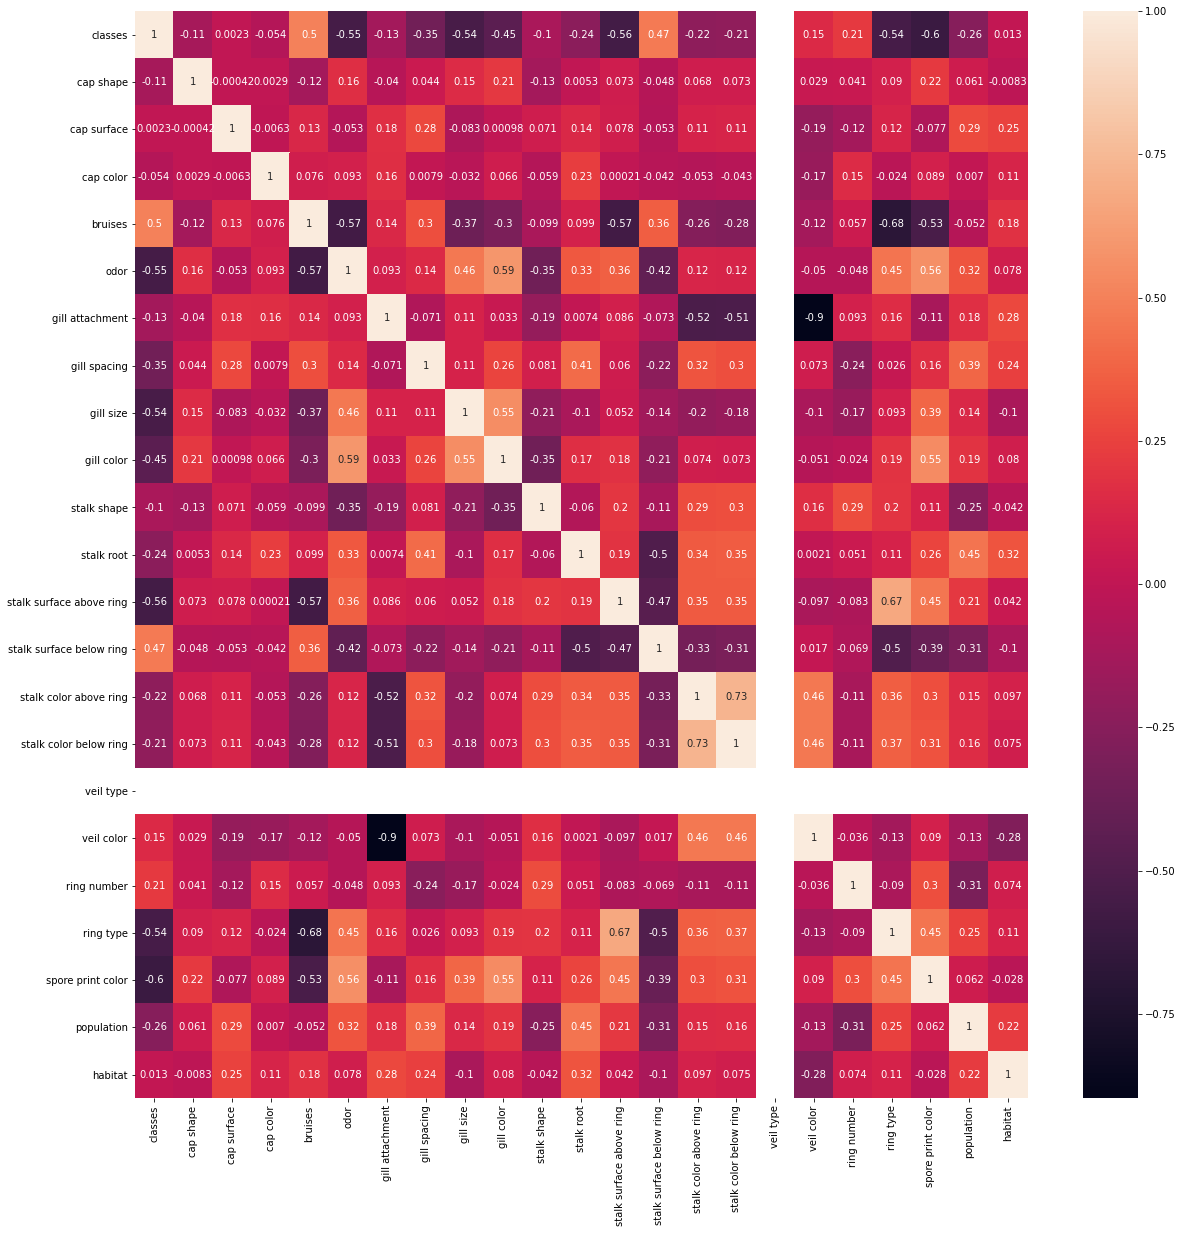

In [190]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [191]:
# Ploting outliers

classes    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

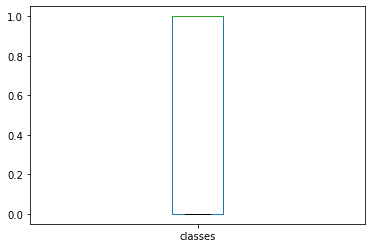

In [192]:
df["classes"].plot(kind="box",subplots=True)

cap shape    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

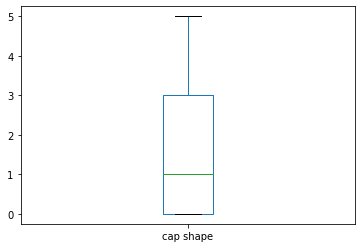

In [193]:
df["cap shape"].plot(kind="box",subplots=True)

cap surface    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

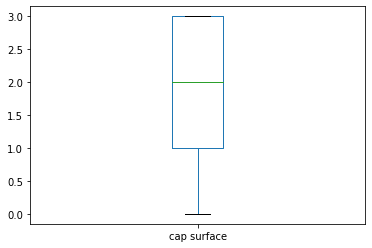

In [194]:
df["cap surface"].plot(kind="box",subplots=True)

cap color    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

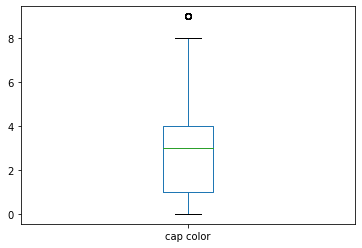

In [195]:
df["cap color"].plot(kind="box",subplots=True)

bruises    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

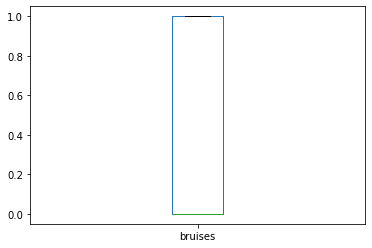

In [196]:
df["bruises"].plot(kind="box",subplots=True)

odor    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

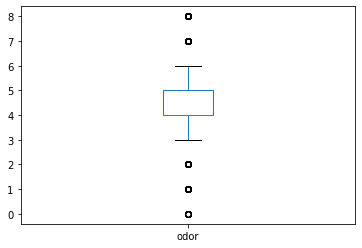

In [197]:
df["odor"].plot(kind="box",subplots=True)

gill attachment    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

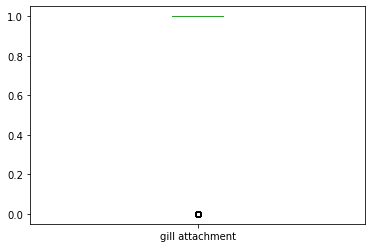

In [198]:
df["gill attachment"].plot(kind="box",subplots=True)

gill spacing    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

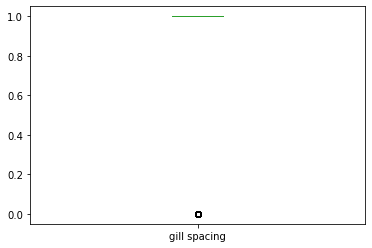

In [199]:
df["gill spacing"].plot(kind="box",subplots=True)

gill size    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

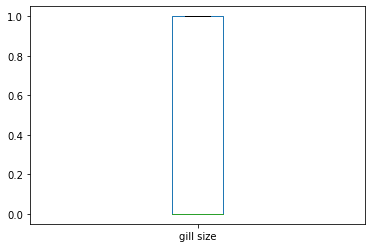

In [200]:
df["gill size"].plot(kind="box",subplots=True)

gill color    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

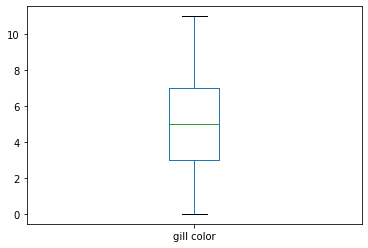

In [201]:
df["gill color"].plot(kind="box",subplots=True)

stalk shape    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

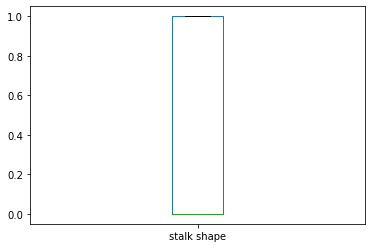

In [202]:
df["stalk shape"].plot(kind="box",subplots=True)

stalk root    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

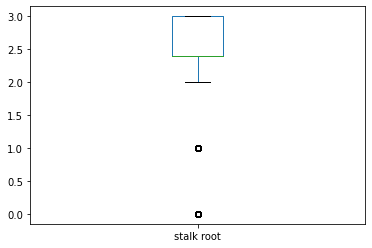

In [203]:
df["stalk root"].plot(kind="box",subplots=True)

stalk surface above ring    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

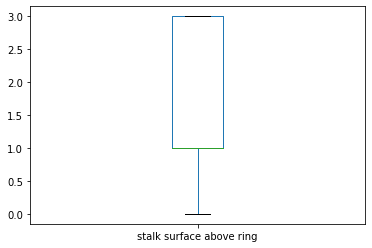

In [204]:
df["stalk surface above ring"].plot(kind="box",subplots=True)

stalk surface below ring    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

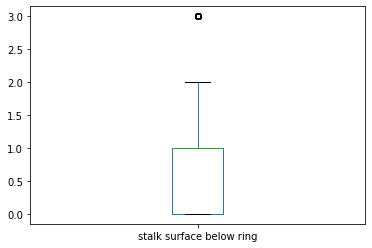

In [205]:
df["stalk surface below ring"].plot(kind="box",subplots=True)

stalk color above ring    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

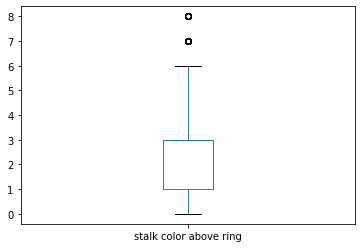

In [206]:
df["stalk color above ring"].plot(kind="box",subplots=True)

stalk color below ring    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

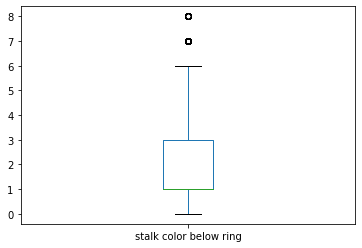

In [207]:
df["stalk color below ring"].plot(kind="box",subplots=True)

veil type    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

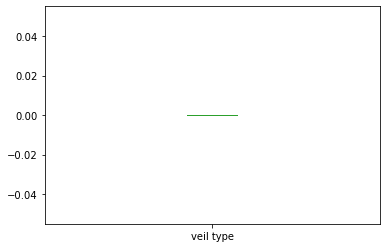

In [208]:
df["veil type"].plot(kind="box",subplots=True)

veil color    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

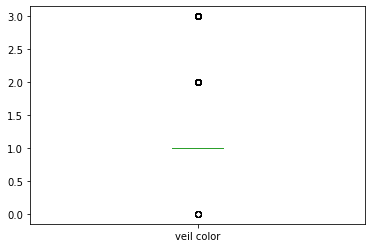

In [209]:
df["veil color"].plot(kind="box",subplots=True)

ring number    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

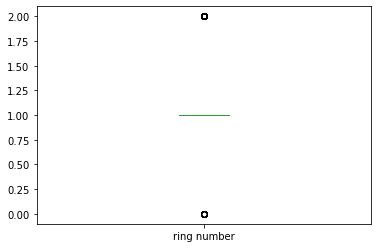

In [210]:
df["ring number"].plot(kind="box",subplots=True)

ring type    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

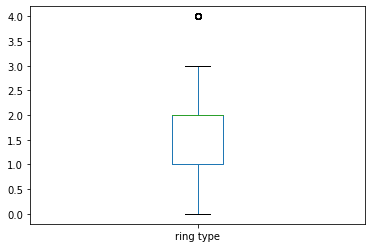

In [211]:
df["ring type"].plot(kind="box",subplots=True)

spore print color    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

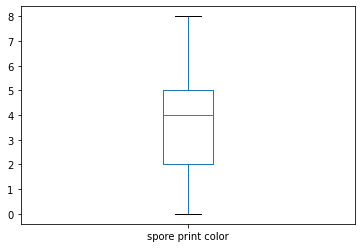

In [212]:
df["spore print color"].plot(kind="box",subplots=True)

population    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

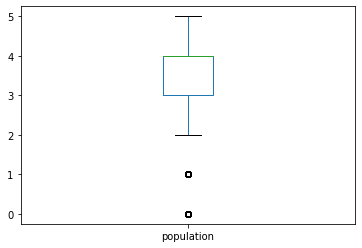

In [213]:
df["population"].plot(kind="box",subplots=True)

habitat    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

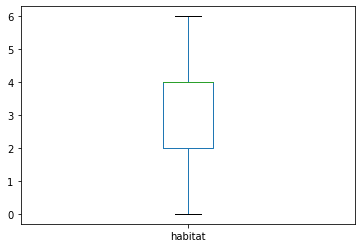

In [214]:
df["habitat"].plot(kind="box",subplots=True)

from the above observation we find that there are some outliers in most of the attributes 

In [215]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.03067919, 1.28711822, ..., 1.26248864, 1.64664   ,
        1.30766297],
       [0.96468045, 1.03067919, 1.28711822, ..., 0.67465864, 0.9708821 ,
        0.67831143],
       [0.96468045, 0.40130173, 1.28711822, ..., 0.67465864, 0.9708821 ,
        0.04895989],
       ...,
       [0.96468045, 0.8574532 , 1.28711822, ..., 1.85031863, 2.32239789,
        1.9370145 ],
       [1.0366127 , 1.48683066, 1.08829032, ..., 1.08883133, 0.38063369,
        1.9370145 ],
       [0.96468045, 1.03067919, 1.28711822, ..., 2.26449131, 2.32239789,
        1.9370145 ]])

In [216]:
print(np.where(z<3))

(array([   0,    0,    0, ..., 8123, 8123, 8123], dtype=int64), array([ 0,  1,  2, ..., 20, 21, 22], dtype=int64))


In [217]:
z[3984][18]

3.4332552519568216

In [218]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat


In [219]:
z[1][1]

1.0306791932626356

In [220]:
df

,classes,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,0,0,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,1,0,1,2,1,2,1,1,0,1,...,1,1,1,0,1,1,1,2,2,2
2,1,1,1,3,1,3,1,1,0,2,...,1,1,1,0,1,1,1,2,2,3
3,0,0,3,3,1,1,1,1,1,2,...,1,1,1,0,1,1,1,1,1,1
4,1,0,1,4,0,4,1,0,0,1,...,1,1,1,0,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,1,1,0,4,0,1,0,11,...,1,7,7,0,3,1,1,0,0,0
8120,1,0,1,1,0,4,0,1,0,11,...,1,7,7,0,2,1,1,0,4,0
8121,1,3,1,1,0,4,0,1,0,2,...,1,7,7,0,3,1,1,0,0,0
8122,0,4,3,1,0,7,1,1,1,9,...,0,1,1,0,1,1,2,5,4,0


# preparing dataset for model training

seperating independent and dependent variable

In [221]:
x=df.drop("classes",axis=1)
y=df["classes"]

# Scaling

Model can be biased to higher values in dataset so it is better to scale the dataset .so that we can bring all the column in common range.

There are 2 algorithmns for scaling

1)standard scaler

2)minmax scaler

Here we will use standard scaler which will be appropriate for our dataset

In [222]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [223]:
x

,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,0,1,2,1,2,1,1,0,1,1,...,1,1,1,0,1,1,1,2,2,2
2,1,1,3,1,3,1,1,0,2,1,...,1,1,1,0,1,1,1,2,2,3
3,0,3,3,1,1,1,1,1,2,1,...,1,1,1,0,1,1,1,1,1,1
4,0,1,4,0,4,1,0,0,1,0,...,1,1,1,0,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,1,1,0,4,0,1,0,11,1,...,1,7,7,0,3,1,1,0,0,0
8120,0,1,1,0,4,0,1,0,11,1,...,1,7,7,0,2,1,1,0,4,0
8121,3,1,1,0,4,0,1,0,2,1,...,1,7,7,0,3,1,1,0,0,0
8122,4,3,1,0,7,1,1,1,9,0,...,0,1,1,0,1,1,2,5,4,0


splitting the testing and training data

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [225]:
x_train.shape

(5443, 22)

In [226]:
y_train.shape

(5443,)

In [227]:
x_test.shape

(2681, 22)

In [228]:
x_test.shape

(2681, 22)

# finding best method
There are various algorithms to predict the target variable. Here we will use the following method which will suit for the given data

1) Logical Regression

2) Support vector regressor


In [229]:
#Logical regression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred))
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))

[1 0 0 ... 1 1 1]

Accuracy score :  0.9843342036553525

Confussion matrix :  [[1292   11]
 [  31 1347]]

classification report :                precision    recall  f1-score   support

           0       0.98      0.99      0.98      1303
           1       0.99      0.98      0.98      1378

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



2) support vector regressor

In [230]:
#finding best parameters for svr
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
parameters={"kernel":["linera","poly","rbf","sigmoid"]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)




{'kernel': 'rbf'}


In [231]:
#SVR METHOD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
sv=SVR(kernel="rbf")
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2score : " ,svs*100)
svscore=cross_val_score(sv,x,y,cv=3)
svc=svscore.mean()
print("cross value score : ",svc*100)

r2score :  98.5446478198214
cross value score :  -2.8429829002755853


Both logical regression and support vector regression shows high accuracy of 98%. since cv score is in negative we will take logical regression



# HYPERPARAMETER TUNING

In [232]:
#creating parameter list to pass in gridsearch CV
param_grid_lr = [{"C": [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}]




In [233]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(lg, param_grid = param_grid_lr,scoring='accuracy',cv=10,refit=True,n_jobs=1)
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("Final accuracy = ",r2_score(y_test,GCV_pred)*100)

Final accuracy =  98.80548070936001


# Serialization

In [234]:
import joblib
joblib.dump(lg,"mushroom_dataset.pkl")


['mushroom_dataset.pkl']